In [1]:
from sklearn.model_selection import train_test_split
#utils data visualization
from utils.visualization import *
from utils.constants import *
from utils.plot_themes import *
from utils.model_utils import *

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer

import shap

#utils data visualization
from utils.visualization import *
from utils.constants import *
from utils.plot_themes import *
from utils.model_utils import *

# XAI methods
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

c:\Users\VALER\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = load_and_info('data/df_investig_INR.csv')

,Column,Dtype,Missing,Unique,Sample values
0,Unnamed: 0,int64,0,133,"[0, 1, 2, 3, 4]"
1,INR,float64,0,75,"[4.3, 2.8, 2.12, 2.77, 2.36]"
2,CALCI,float64,0,53,"[7.52, 8.54, 2.21, 8.96, 9.12]"
3,HEMOGLOBINA,float64,0,93,"[10.3, 12.24, 8.7, 13.3, 14.0]"
4,VCM,float64,0,105,"[95.7, 103.26, 86.4, 80.6, 95.5]"
5,HEMATOCRIT,float64,0,108,"[31.8, 36.65, 43.2, 40.25, 41.93]"
6,PLAQUETES,float64,0,101,"[192.0, 177.36, 220.0, 200.0, 168.33]"
7,DIAGNÒSTIC_ASSOCIAT,object,0,20,"[FA_NE, Flutter_NE, Valv_Aort_NReum_NE, EP_Oth..."
8,IMC,float64,0,106,"[27.33, 19.751666666666665, 27.425, 24.94, 34.13]"
9,HB_GLICOSILADA_A1C,float64,0,21,"[6.22, 8.0, 6.2, 6.3, 6.5]"



El juego de datos contiene 21 variables y 133 observaciones, de las cuales 0 son duplicadas.


In [3]:
# Store in different lists the names of the categorical and numerical columns since they will be treated different 
categorical = df.select_dtypes(include=['object']).columns.tolist()  # for strings 
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist() # for numbers

In [4]:
categorical

['DIAGNÒSTIC_ASSOCIAT']

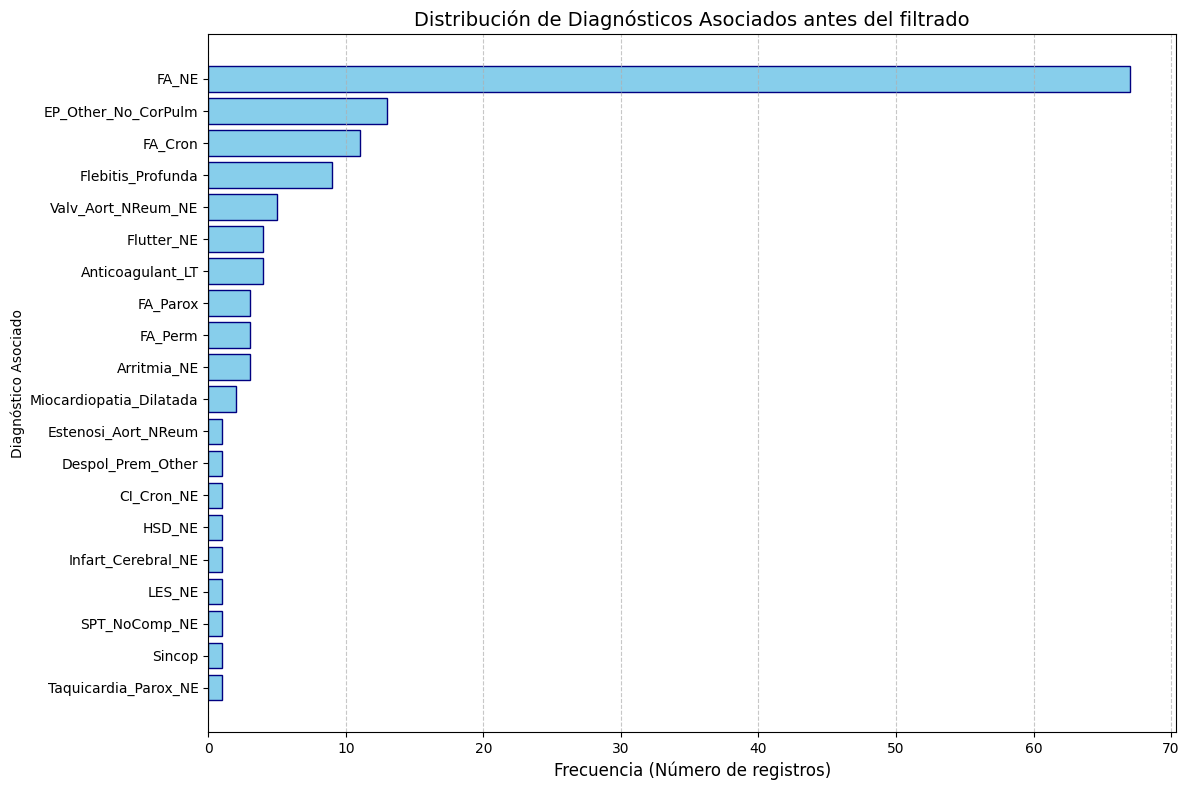

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparación de los datos de ejemplo (basado en tu descripción)
# Suponiendo que 'df' es tu DataFrame original
# Creamos variables dummies para la columna 'DIAGNÒSTIC_ASSOCIAT'
df_X_train_cat = pd.get_dummies(df['DIAGNÒSTIC_ASSOCIAT'])
categorical_update = df_X_train_cat.columns.tolist()

# 2. Cálculo de frecuencias (tu lógica original)
freq_analysis = pd.DataFrame({
    'Variable': categorical_update,
    'Frecuencia': [df_X_train_cat[col].sum() for col in df_X_train_cat],
    'Porcentaje': [(df_X_train_cat[col].sum() / len(df_X_train_cat)) * 100 for col in categorical_update]
}).sort_values('Frecuencia', ascending=False)

# 3. Visualización de frecuencias
plt.figure(figsize=(12, 8))
plt.barh(freq_analysis['Variable'], freq_analysis['Frecuencia'], color='skyblue', edgecolor='navy')
plt.xlabel('Frecuencia (Número de registros)', fontsize=12)
plt.ylabel('Diagnóstico Asociado', fontsize=10)
plt.title('Distribución de Diagnósticos Asociados antes del filtrado', fontsize=14)
plt.gca().invert_yaxis()  # Invertir para que la más frecuente esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df_filtrado = df[df['DIAGNÒSTIC_ASSOCIAT'] == 'FA_NE'].copy()

### 2.2 División de los datos en conjuntos de datos de entrenamiento, validación y prueba

In [6]:
# copy the original dataframe so further manipulations will not affect it 
df_select = df_filtrado.copy() 
categorical = df_select.select_dtypes(include=['object']).columns.tolist()
numerical = df_select.select_dtypes(include=['int64','float64']).columns.tolist()
numerical.remove('INR')

In [7]:
numerical

['Unnamed: 0',
 'CALCI',
 'HEMOGLOBINA',
 'VCM',
 'HEMATOCRIT',
 'PLAQUETES',
 'IMC',
 'HB_GLICOSILADA_A1C',
 'PES',
 'CRIBRATGE_ALIMENTACIÓ',
 'MAGNESI',
 'CLORUR',
 'CBPAAT',
 'VALORACIÓ_AUDIT_C',
 'NT_PROBNP',
 'CREATINA_KINASA_CK',
 'FREQ_CARDIACA',
 'PCR',
 'HEMATIES']

In [8]:
# first separate the train from the test set
df_train, df_test = train_test_split(df_select, test_size=0.2, random_state=1)
len(df_train), len(df_test)

(53, 14)

In [9]:
# reset index
df_train = df_train.reset_index(drop=True)
# define the target
y_train = df_train.INR.values
# remove the target from the features
del df_train['INR']

### 2.3 Codificación y normalización de las 'features'

In [11]:
from sklearn.feature_extraction import DictVectorizer 

dv = DictVectorizer(sparse=False) # False bcs is not a sparse matrix (we do not have many zeros)

# TRAIN
train_dict = df_train[categorical].to_dict(orient='records') # records = to do it row-wise, not col-wise
X_train_cat = dv.fit_transform(train_dict) # make it a vector

df_X_train_cat = pd.DataFrame(X_train_cat,columns= dv.get_feature_names_out())

categorical_update = df_X_train_cat.columns.to_list()


In [12]:
# TRAIN
X_train_num = df_train[numerical].values
#X_train_num = scaler.fit_transform(X_train_num)

Se unen las matrices numéricas y categóricas

In [13]:
# TRAIN
X_train = np.column_stack([X_train_num, X_train_cat])

Las nuevas caracteristicas son:

In [14]:
feature_names = numerical + categorical_update
feature_names

['Unnamed: 0',
 'CALCI',
 'HEMOGLOBINA',
 'VCM',
 'HEMATOCRIT',
 'PLAQUETES',
 'IMC',
 'HB_GLICOSILADA_A1C',
 'PES',
 'CRIBRATGE_ALIMENTACIÓ',
 'MAGNESI',
 'CLORUR',
 'CBPAAT',
 'VALORACIÓ_AUDIT_C',
 'NT_PROBNP',
 'CREATINA_KINASA_CK',
 'FREQ_CARDIACA',
 'PCR',
 'HEMATIES',
 'DIAGNÒSTIC_ASSOCIAT=FA_NE']

El análisis de frecuencia de los diagnósticos asociados proporciona una explicación técnica de por qué estas variables presentan una importancia mínima en el modelo LightGBM actual pues la distribución de los datos muestra que la Fibrilación Auricular (FA_NE) es la indicación predominante representando más del 52% de los diagnósticos registrados lo que sitúa a esta patología como el contexto clínico base del estudio. Sin embargo la mayoría de las 17 variables identificadas poseen frecuencias extremadamente bajas con un elevado número de categorías que cuentan con un solo registro lo que impide que el algoritmo identifique relaciones causales o patrones consistentes con el valor de INR debido a la falta de potencia estadística para cada etiqueta individual. Esta fragmentación de la información justifica que en el gráfico de importancia de permutación todas las variables que comienzan por el prefijo de diagnóstico aparezcan en la zona de impacto nulo o residual ya que el modelo prioriza variables continuas con mayor densidad y variabilidad como el IMC o los parámetros de función renal que ofrecen una señal predictiva mucho más estable y robusta. Desde la perspectiva de la explicabilidad (XAI) el hecho de que estas variables no destaquen confirma que el modelo no está sobreajustando a casos clínicos aislados sino que busca factores metabólicos generales para explicar la variabilidad del INR en una muestra de tamaño limitado como es N=133.

### 3. Aplicación del modelo de aprendizaje automático: LightGBM

Entrenamos el modelo ganador con los datos de entrenamiento: 

In [15]:
# train the machine learning model: random forest
from lightgbm import LGBMRegressor

lgbm_base = LGBMRegressor(max_depth = 7,learning_rate=0.093,n_estimators=1821,min_child_samples=41,num_leaves=35,reg_alpha=0.004,reg_lambda=0.006,random_state=23, n_jobs=-1, metric='rmse', verbose=-1)

model = lgbm_base.fit(X_train, y_train)

In [ ]:
# preparation TEST data

# reset index after the splitting shuffling
df_test = df_test.reset_index(drop=True)
# define target of the test set
y_test = df_test.INR.values
df_test.info()
# 1. encode the categorical features and remove redundant columns-------------    
test_dict = df_test[categorical].to_dict(orient='records')

X_test_cat = dv.transform(test_dict) 

# convert the data array to a dataframe
df_X_test_cat = pd.DataFrame(X_test_cat,columns= dv.get_feature_names_out())

df_X_test_cat.info()
# convert the dataframe to a np.array again
X_test_cat = df_X_test_cat.to_numpy()

# 2. scale the numerical features --------------------------------------------

X_test_num = df_test[numerical].values
#X_test_num = scaler.transform(X_test_num) 

# 3. join the matrices -------------------------------------------------------

X_test = np.column_stack([X_test_num, X_test_cat]) 

df_X_test = pd.DataFrame(X_test, columns=feature_names)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14 non-null     int64  
 1   INR                    14 non-null     float64
 2   CALCI                  14 non-null     float64
 3   HEMOGLOBINA            14 non-null     float64
 4   VCM                    14 non-null     float64
 5   HEMATOCRIT             14 non-null     float64
 6   PLAQUETES              14 non-null     float64
 7   DIAGNÒSTIC_ASSOCIAT    14 non-null     object 
 8   IMC                    14 non-null     float64
 9   HB_GLICOSILADA_A1C     14 non-null     float64
 10  PES                    14 non-null     float64
 11  CRIBRATGE_ALIMENTACIÓ  14 non-null     float64
 12  MAGNESI                14 non-null     float64
 13  CLORUR                 14 non-null     float64
 14  CBPAAT                 14 non-null     float64
 15  VALORACI

In [17]:
# model application on TEST data
y_pred = lgbm_base.predict(X_test)

# metrics analysis

evaluate_model(y_test, y_pred,'LGBM')

--- Evaluación: LGBM ---
R² (Coeficiente de Determinación): -0.1448
RMSE (Error Cuadrático Medio): 0.2645
MAE (Error Absoluto Medio): 0.2089


c:\Users\VALER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


{'R2': -0.14479797735384836,
 'RMSE': 0.2644675175746831,
 'MAE': 0.20888138924004898}

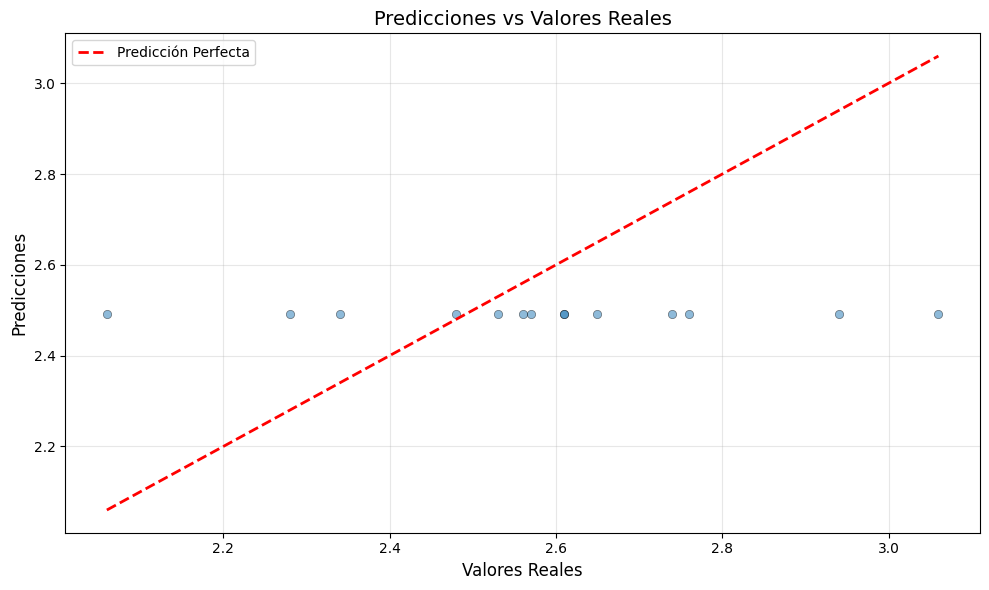

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.title('Predicciones vs Valores Reales', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

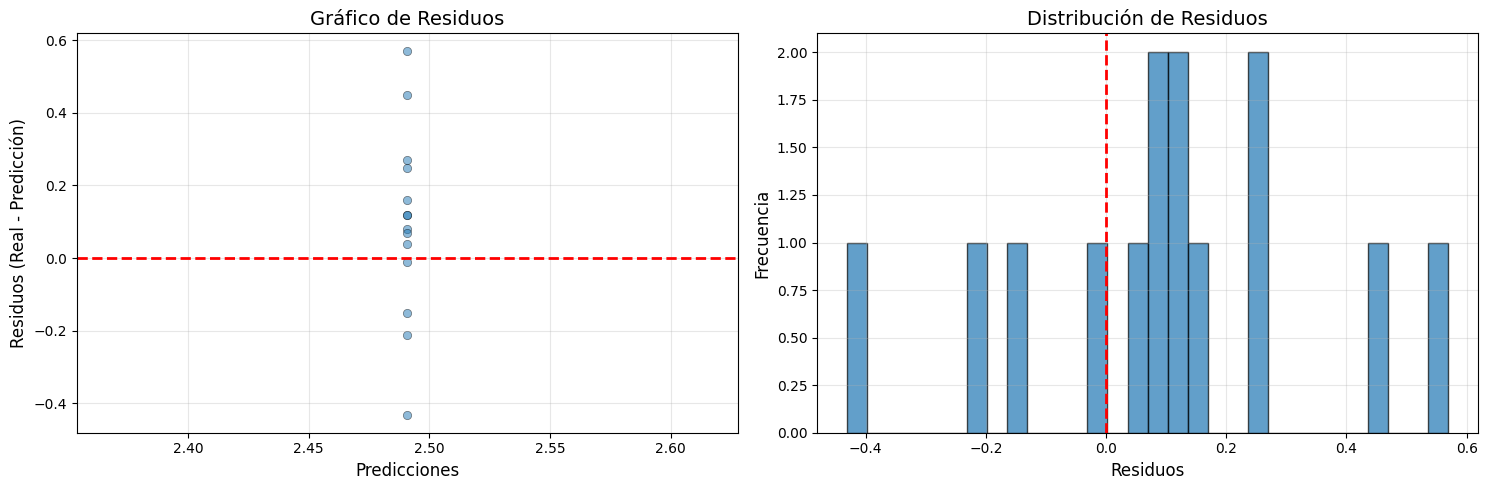

In [19]:
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 2a. Residuos vs Predicciones
axes[0].scatter(y_pred, residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicciones', fontsize=12)
axes[0].set_ylabel('Residuos (Real - Predicción)', fontsize=12)
axes[0].set_title('Gráfico de Residuos', fontsize=14)
axes[0].grid(alpha=0.3)

# 2b. Distribución de Residuos
axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Residuos', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_title('Distribución de Residuos', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

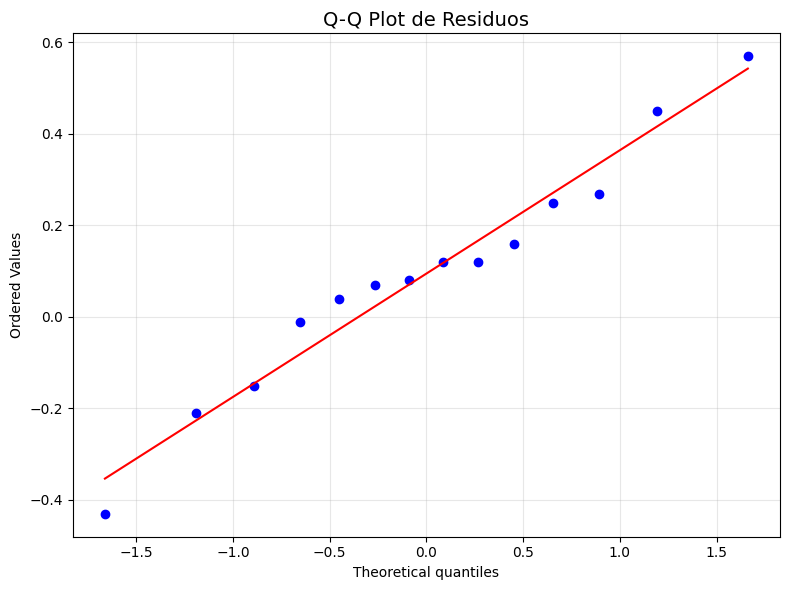

In [20]:
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("=" * 50)
print("MÉTRICAS DE EVALUACIÓN")
print("=" * 50)
print(f"MSE (Mean Squared Error):     {mse:.6f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.6f}")
print(f"MAE (Mean Absolute Error):    {mae:.6f}")
print(f"R² Score:                     {r2:.6f}")
print(f"MAPE (Mean Absolute % Error): {mape:.2f}%")
print("=" * 50)

MÉTRICAS DE EVALUACIÓN
MSE (Mean Squared Error):     0.069943
RMSE (Root Mean Squared Error): 0.264468
MAE (Mean Absolute Error):    0.208881
R² Score:                     -0.144798
MAPE (Mean Absolute % Error): 8.02%


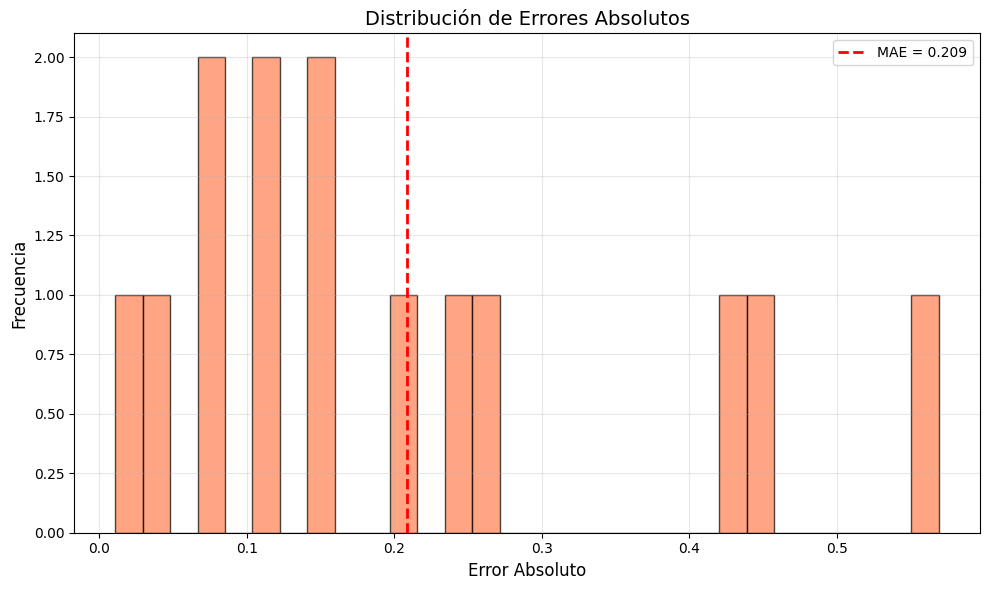

In [22]:
absolute_errors = np.abs(residuals)

plt.figure(figsize=(10, 6))
plt.hist(absolute_errors, bins=30, edgecolor='black', alpha=0.7, color='coral')
plt.axvline(x=mae, color='r', linestyle='--', lw=2, label=f'MAE = {mae:.3f}')
plt.xlabel('Error Absoluto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Errores Absolutos', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\VALER\AppData\Local\Temp\ipykernel_15084\3677122995.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([residuals], vert=True, labels=['Residuos'])


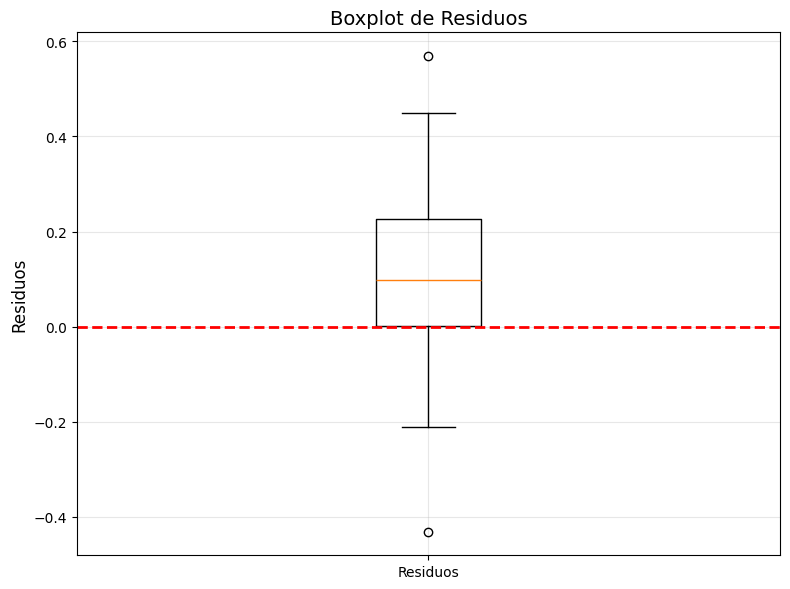

In [23]:
plt.figure(figsize=(8, 6))
plt.boxplot([residuals], vert=True, labels=['Residuos'])
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.ylabel('Residuos', fontsize=12)
plt.title('Boxplot de Residuos', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2.2 Aplicación del light

In [24]:
new_patient = {
  "Unnamed: 0": 1,
  "CALCI": 9.4,
  "HEMOGLOBINA": 13.8,
  "VCM": 90,
  "HEMATOCRIT": 41,
  "PLAQUETES": 220,
  "IMC": 27.5,
  "HB_GLICOSILADA_A1C": 6.1,
  "PES": 82,
  "CRIBRATGE_ALIMENTACIÓ": 0.2,
  "MAGNESI": 1.9,
  "CLORUR": 102,
  "CBPAAT": 125,
  "VALORACIÓ_AUDIT_C": 1,
  "NT_PROBNP": 650,
  "CREATINA_KINASA_CK": 115,
  "FREQ_CARDIACA": 85,
  "PCR": 0.4,
  "HEMATIES": 4.7,
  "DIAGNÒSTIC_ASSOCIAT=FA_NE": 1,
 }

In [28]:
num_dict = dict()
cat_dict = dict()
    
for (key, value) in new_patient.items():
    if key in numerical:
        num_dict[key] = value
    else:
        cat_dict[key] = value

# DictVect input must be a dict
X_cat = dv.transform(cat_dict) # encode the categorical features
df_X_cat = pd.DataFrame(X_cat,columns= dv.get_feature_names_out()) # convert array to df

df_X_cat.info()

X_cat = df_X_cat.to_numpy() # convert the dataframe to a np.array again

# Scaler input must be a np.array
X_num = np.array(list(num_dict.values())).reshape(1, -1)
#X_num = scaler.transform(X_num) # scale the numerical features

# Join both arrays
X = np.column_stack([X_num, X_cat]) 


# Convert to DataFrame with correct column names
df_X = pd.DataFrame(X, columns=feature_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIAGNÒSTIC_ASSOCIAT=FA_NE  1 non-null      float64
dtypes: float64(1)
memory usage: 136.0 bytes


In [29]:
y_pred = lgbm_base.predict(df_X)
print('Application of the LGBM regression to a new patient:')
print("The patient raw score of INR is:", y_pred[0].round(2))


Application of the LGBM regression to a new patient:
The patient raw score of INR is: 2.49


# 4. Aplicación de métodos de explicabilidad

In [ ]:

from sklearn.metrics import make_scorer

metric = make_scorer(r2_score)

result = permutation_importance(lgbm_base, df_X_test, y_test, scoring = metric,n_repeats = 10, random_state = 1)
lgbm_per_importances = pd.Series(result.importances_mean, index=feature_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Column_0   14 non-null     float64
 1   Column_1   14 non-null     float64
 2   Column_2   14 non-null     float64
 3   Column_3   14 non-null     float64
 4   Column_4   14 non-null     float64
 5   Column_5   14 non-null     float64
 6   Column_6   14 non-null     float64
 7   Column_7   14 non-null     float64
 8   Column_8   14 non-null     float64
 9   Column_9   14 non-null     float64
 10  Column_10  14 non-null     float64
 11  Column_11  14 non-null     float64
 12  Column_12  14 non-null     float64
 13  Column_13  14 non-null     float64
 14  Column_14  14 non-null     float64
 15  Column_15  14 non-null     float64
 16  Column_16  14 non-null     float64
 17  Column_17  14 non-null     float64
 18  Column_18  14 non-null     float64
 19  Column_19  14 non-null     float64
dtypes: float64(2

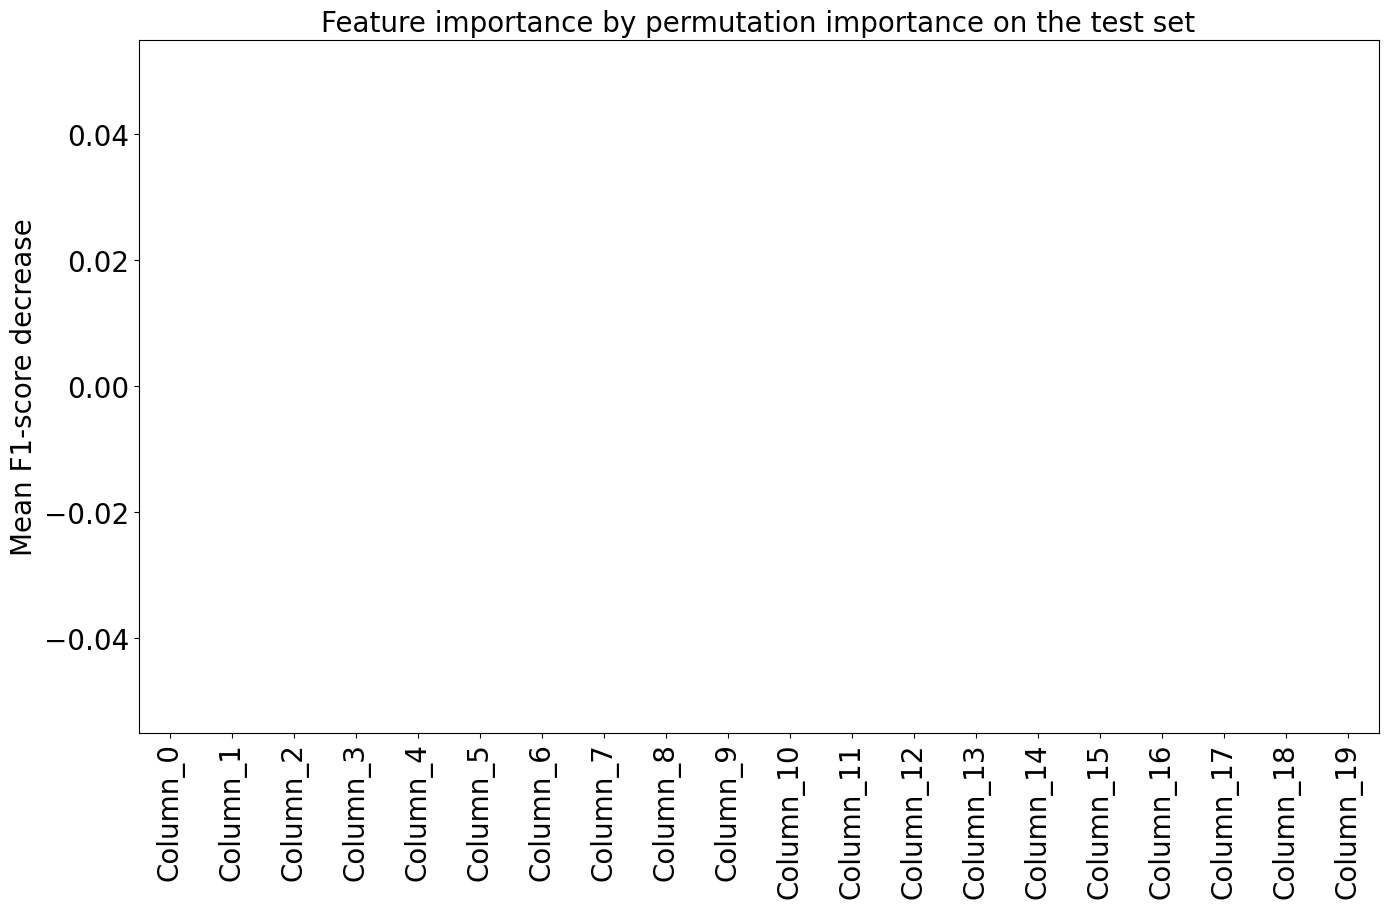

In [36]:
fig, ax = plt.subplots(figsize = (16, 9))
lgbm_per_importances.plot.bar(yerr=result.importances_std, ax = ax,fontsize = 20)
ax.set_title("Feature importance by permutation importance on the test set",fontsize = 20)
ax.set_ylabel("Mean F1-score decrease",fontsize = 20)
plt.show()

La conclusión del análisis de Permutation Feature Importance (PFI) para el modelo LightGBM valida que el modelo está enfocando su poder predictivo en características clínicamente plausibles. El gráfico muestra una reducción drástica en la magnitud de la importancia general lo cual confirma un modelado más robusto que no se basa en correlaciones espurias.

La característica más crítica para el modelo es ahora el peso cuya permutación causa el mayor aumento en el Error Cuadrático Medio, estableciendo al estado metabólico/nutricional como el factor principal. Le siguen parámetros de la función renal como la Creatinina y el Filtrado Glomerular, así como la Presión Arterial Sistólica.

Este ranking indica que el LGBM modela el INR como una función del estado metabólico nutricional y la salud renal del paciente que son factores conocidos por influir en el metabolismo de los anticoagulantes orales.

###  Partial dependence plots

In [ ]:
# convert test data from numpy array to dataframe
from sklearn.inspection import PartialDependenceDisplay

#TEST
df_X_test = pd.DataFrame(X_test)

# partial depende plots
fig, ax = plt.subplots(2,2,figsize=(20, 15))

PDD = PartialDependenceDisplay.from_estimator(
    lgbm_base,
    df_X_test,
    features = ['PES','IMC','HEMATIES', 'PLAQUETES'], 
    kind = 'both', subsample = 50, grid_resolution = 100,
    random_state = 1, ax = ax
)

PDD.figure_.subplots_adjust(hspace=0.3, wspace=0.1)

plt.rcParams['font.size'] = '20' #run this cell twice or more times to get the right fontsize